# Скачивание и предобработка

Данные - [датасет](https://www.kaggle.com/lodetomasi1995/income-classification) с Kaggle о класификации людей по уровню зп (больше 50к долларов в год или меньше) или как найти партнера по расчету

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from matplotlib import colors
import torch

In [139]:
!wget https://www.dropbox.com/s/c7adlwn5kz066xq/income_evaluation.csv

/bin/bash: wget: command not found


In [140]:
df = pd.read_csv('income_evaluation.csv')

In [141]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [142]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [143]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [144]:
con_col = ['age', ' fnlwgt', ' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']
#class_col = [' workclass',	' education', 'marital-status',	'occupation',	'relationship', 'race',	'sex', 'native-country', 'income']

In [145]:
df = pd.concat((pd.get_dummies(df.drop(con_col, axis=1), drop_first=True), df[con_col]), axis=1)

In [146]:
X = df.drop(' income_ >50K', axis=1)
y = df[' income_ >50K']

In [147]:
X.shape, y.shape

((32561, 100), (32561,))

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8)

# Построение моделей

In [149]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [150]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)

In [151]:
def calc_scores(y_true, y_pred):
  print('Accuracy:', accuracy_score(y_true, y_pred))
  print('F1:', f1_score(y_true, y_pred))
  print('ROC AUC:', roc_auc_score(y_true, y_pred))

In [152]:
calc_scores(y_test, gbc_pred)

Accuracy: 0.8651926915399969
F1: 0.6825741142443963
ROC AUC: 0.7756273551646388


In [153]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [154]:
calc_scores(y_test, rfc_pred)

Accuracy: 0.857362198679564
F1: 0.6819582334816843
ROC AUC: 0.7818325279391292


Тяжело сказать, хорошие ли это результаты для этих данных, так как протестировано мало моделей. Однако сравнивая Gradient Booster Decision Tree и Random Fores, Accuracy, F1 и Roc auc y Gradient Booster Decision Tree немного лучше, чем у Random Forest.

In [155]:
from sklearn.naive_bayes import GaussianNB

In [156]:
gnb = GaussianNB()
gnb_pred = gnb.fit(X_train, y_train).predict(X_test)

In [157]:
calc_scores(y_test, gnb_pred)

Accuracy: 0.8000921234454169
F1: 0.4289473684210527
ROC AUC: 0.6333925218437889


<IPython.core.display.Javascript object>


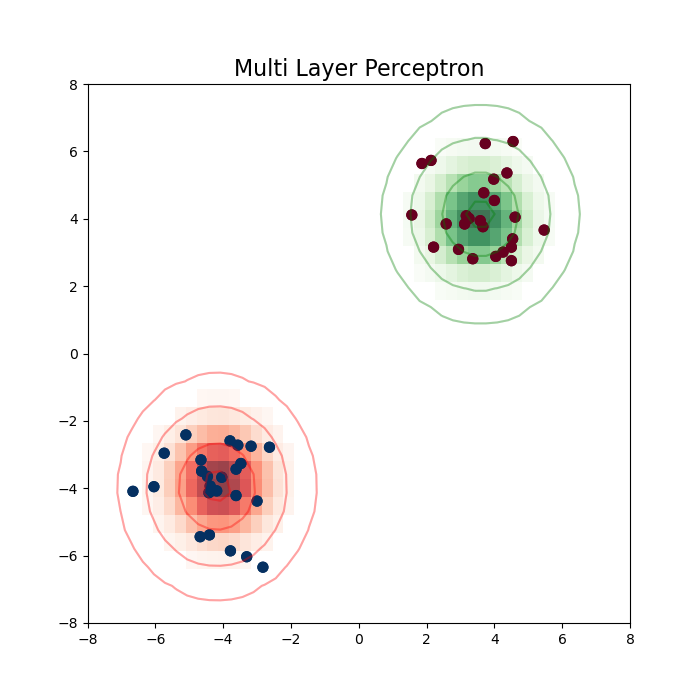

[(-8.0, 8.0), (-8.0, 8.0)]

In [168]:
from sklearn.datasets import make_blobs
X, y = make_blobs(50, 2, centers=[[4,4],[-4,-4]], random_state=2, cluster_std=[1,1])

fig, ax = plt.subplots(figsize = (7,7))

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Classifier', size=16)

lim_x = (-8, 8)
lim_y = (-8, 8)

xg = np.linspace(lim_x[0], lim_x[1], 50)
yg = np.linspace(lim_y[0], lim_y[1], 30)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

gnb = GaussianNB()
gnb.fit(X,y)

for label, color in enumerate(['green', 'red']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.05)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)

Результаты хуже, чем у лесов

In [159]:
from sklearn.neural_network import MLPClassifier

In [160]:
mlp = MLPClassifier((100, 40, 10))
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)

In [161]:
calc_scores(y_test, mlp_pred)

Accuracy: 0.7941040994933211
F1: 0.3940352462720289
ROC AUC: 0.6178743275109058


<IPython.core.display.Javascript object>


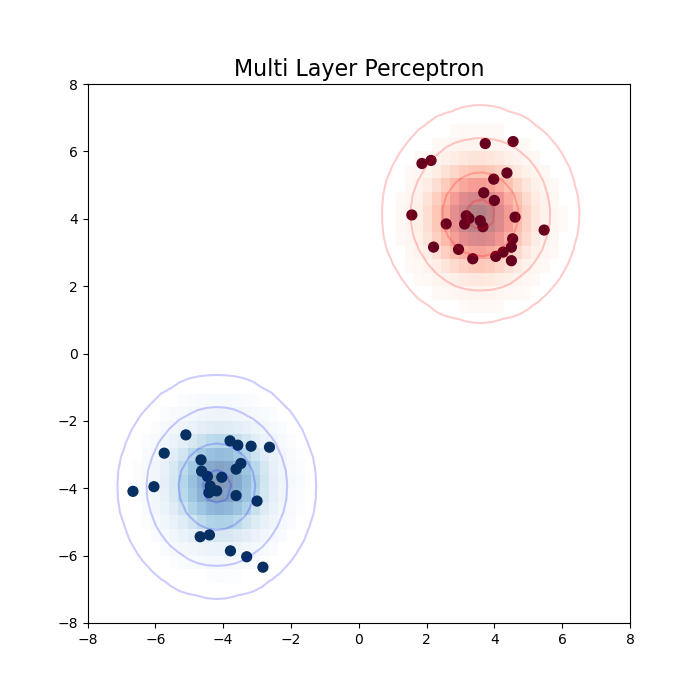

[(-8.0, 8.0), (-8.0, 8.0)]

In [175]:
fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Multi Layer Perceptron', size=16)

xlim = (-8, 8)
ylim = (-8, 8)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

mlp = MLPClassifier()
mlp.fit(X,y)

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    Xgrid_Pred = mlp.predict(Xgrid)
    
ax.set(xlim=xlim, ylim=ylim)

Ну, такое себе, что вполне прогнозируемо, так как известно, что НН работают с табличными данными хуже, чем условные бустинги, поэтому под конец запустим еще катбуст для сравнения:))

In [163]:
!pip install catboost

     |████████████████████████████████| 13.1 MB 738 kB/s eta 0:00:01
     |████████████████████████████████| 13.2 MB 1.6 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=becf8583728fbed8c5c6c324a073fd43b0dcdf4b2ab61805c3007632613745c9
  Stored in directory: /Users/annamarkina/Library/Caches/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [164]:
from catboost import CatBoostClassifier

In [165]:
cbc = CatBoostClassifier()
cbc.fit(X_train, y_train)
cbc_pred = cbc.predict(X_test)

Learning rate set to 0.041445
0:	learn: 0.6490667	total: 69.1ms	remaining: 1m 8s
1:	learn: 0.6107208	total: 82.9ms	remaining: 41.4s
2:	learn: 0.5807798	total: 98.8ms	remaining: 32.8s
3:	learn: 0.5537368	total: 121ms	remaining: 30.2s
4:	learn: 0.5268257	total: 149ms	remaining: 29.6s
5:	learn: 0.5072312	total: 175ms	remaining: 28.9s
6:	learn: 0.4858603	total: 200ms	remaining: 28.3s
7:	learn: 0.4674002	total: 231ms	remaining: 28.6s
8:	learn: 0.4515568	total: 259ms	remaining: 28.5s
9:	learn: 0.4381364	total: 299ms	remaining: 29.6s
10:	learn: 0.4271273	total: 325ms	remaining: 29.2s
11:	learn: 0.4165631	total: 356ms	remaining: 29.3s
12:	learn: 0.4063540	total: 382ms	remaining: 29s
13:	learn: 0.3979384	total: 410ms	remaining: 28.8s
14:	learn: 0.3909049	total: 453ms	remaining: 29.8s
15:	learn: 0.3840878	total: 510ms	remaining: 31.4s
16:	learn: 0.3782963	total: 566ms	remaining: 32.7s
17:	learn: 0.3734887	total: 587ms	remaining: 32s
18:	learn: 0.3685350	total: 602ms	remaining: 31.1s
19:	learn: 0

In [166]:
calc_scores(y_test, cbc_pred)

Accuracy: 0.8714877936434823
F1: 0.7094758764317945
ROC AUC: 0.7968085985624295


Катбуст - ожидаемо хорош для классификации на табличных данных с большим количеством категориальных признаков